### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [63]:
data = pd.read_csv('data/coupons.csv')

In [49]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

destination
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64


passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64


weather
Sunny    10069
Snowy     1405
Rainy     1210
Name: count, dtype: int64


temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64


time
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: count, dtype: int64


coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64


expiration
1d    7091
2h    5593
Name: count, dtype: int64


gender
Female    6511
Male      6173
Name: count, dtype: int64


age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64


maritalStatus
Married partner      5100
Single         

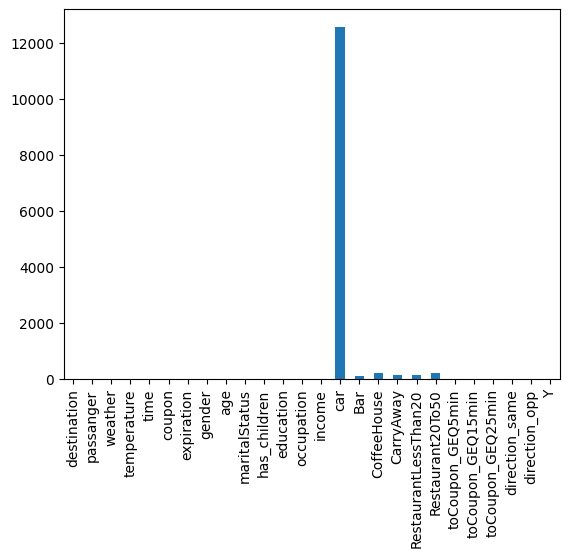

NaNs per row


1    11971
2      542
0      108
6       42
3       21
Name: count, dtype: int64

In [54]:
#Check type of values in the various columns
for col in data.columns:
    print(data[col].value_counts().sort_values(ascending=False))
    print('\n')

#Check which all data points have bad data.
data.isnull().sum().plot(kind='bar')
plt.show()

# There are null values in columns that track the user's habits.
# Check if there are more than one NaN per row
print("NaNs per row")
nan_counts = data.isnull().sum(axis=1)
nan_counts.value_counts()

3. Decide what to do about your missing data -- drop, replace, other...

(12621, 26)
age
21    2647
26    2547
31    2012
51    1776
36    1319
41    1087
46     686
18     547
Name: count, dtype: int64


<Axes: >

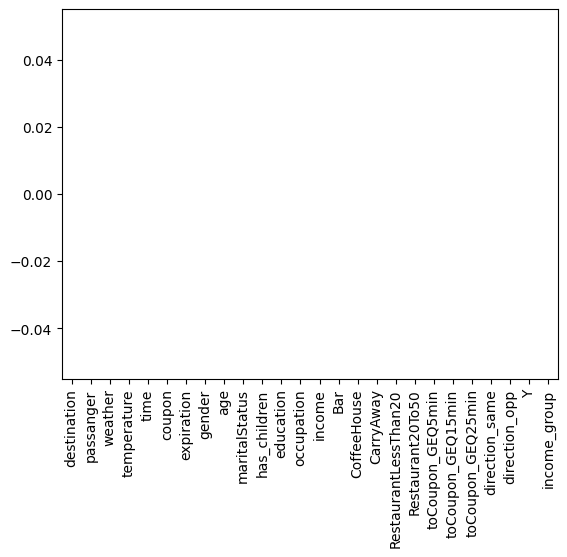

In [255]:
# Information regarding "car" is not collected for most records. Hence, removing
# the column
data.drop(columns=['car'], inplace=True, errors='ignore')

# if NaN count > 1 per row, remove those rows
data.dropna(axis= 0, thresh = (data.shape[1] - 1), inplace=True)
# If there is just one NaN per row, replacing that with "never"
data.fillna('never', inplace=True)

#noticed that age has some non-numerical data. Updating below21 to 18 and 50plus to 51
data['age'] = data['age'].replace('below21', 18)
data['age'] = data['age'].replace('50plus', 51)
data['age'] = data['age'].astype(int)

#Adding a map for the income values
income_map = { '$25000 - $37499' : 3,'$12500 - $24999' : 2,'$37500 - $49999' : 4,
               '$100000 or More' : 9, '$50000 - $62499'  : 5, 'Less than $12500' : 1,
               '$87500 - $99999' : 8, '$75000 - $87499' : 7, '$62500 - $74999' : 6 }
data['income_group'] = data['income'].map(income_map)

#checking the cleansed dataset
print(data.shape)
print(data['age'].value_counts())
data.isnull().sum().plot(kind='bar')


4. What proportion of the total observations chose to accept the coupon?



In [28]:
# Observations with "Y" / Total Observations
print("Proportion that accepted the coupon : " + str(data[data['Y'] == 1].shape[0]/data.shape[0]))

Proportion that accepted the coupon : 0.5681007844069408


5. Use a bar plot to visualize the `coupon` column.

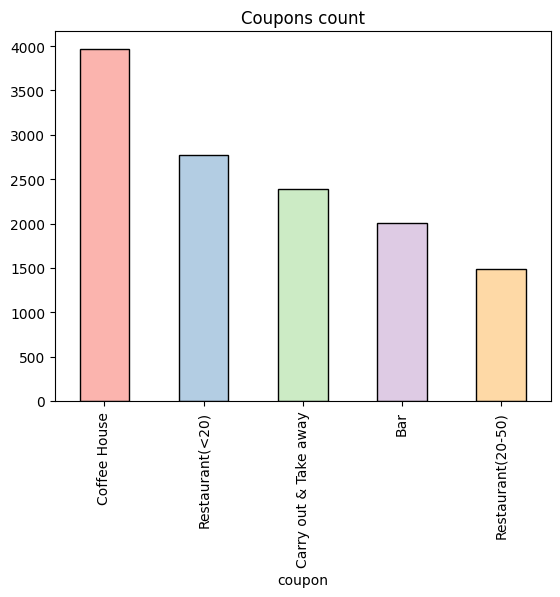

In [144]:
#bar plot using Pandas (This is a simple plot. hence, using the inbuilt charts are good enough)
colors = plt.get_cmap('Pastel1')
data['coupon'].value_counts().plot(kind='bar', title = 'Coupons count', color=colors.colors, edgecolor='black')
plt.show()

6. Use a histogram to visualize the temperature column.

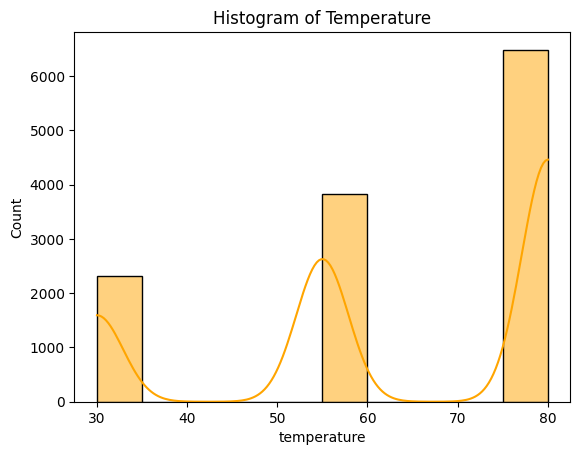

In [134]:
#histogram to visualize temperature
sns.histplot(data['temperature'],bins = 10, kde=True, color='orange')
plt.title('Histogram of Temperature')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [69]:
df_bar = data[data['coupon'] == 'Bar']
df_bar.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


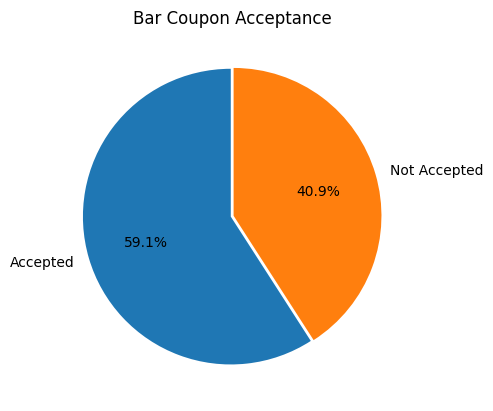

Proportion of  Bar coupons that were accepted : 0.4089775561097257


In [181]:
bar_coupon_acceptance = df_bar.Y.mean()

#This data can be displayed well in a pie chart
plt.pie(df_bar['Y'].value_counts(normalize=True), labels=['Accepted', 'Not Accepted'], autopct='%1.1f%%', startangle=90,
        explode=(0.01, 0.01))
plt.title('Bar Coupon Acceptance')
plt.show()

print("Proportion of  Bar coupons that were accepted : " + str(bar_coupon_acceptance))


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


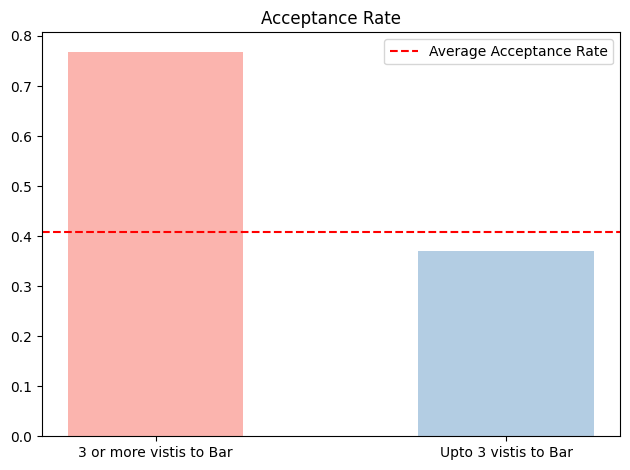

Acceptance rate for those who went to a bar 3 or fewer times a month : 0.3693244739756368
Acceptance rate for those who went more : 0.7688442211055276


In [186]:
# Values from eaelier calculations are as follows
# never    5015
# less1    3430
# 1~3      2385
# 4~8      1076
# gt8       349

#List of values that correspond to 3 or more visits
gt3 = ['4~8', 'gt8']

#DF with 3 or more vists
df_bar_gt3 = df_bar.query('Bar in @gt3')
acceptance_rate_gt3 = df_bar_gt3.Y.mean()

#DF with upto 3 visits
df_bar_lt3 = df_bar.query('Bar not in @gt3')
acceptance_rate_lt3 = df_bar_lt3.Y.mean()

#Comparison
plt.bar( x = ['3 or more vistis to Bar', 'Upto 3 vistis to Bar'], height = [acceptance_rate_gt3, acceptance_rate_lt3], color = colors.colors, width=0.5)
plt.title('Acceptance Rate')
plt.axhline(y=df_bar.Y.mean(), color='r', linestyle='--', label = 'Average Acceptance Rate')
plt.tight_layout()
plt.legend()
plt.show()
print("Acceptance rate for those who went to a bar 3 or fewer times a month : " + str(acceptance_rate_lt3))
print("Acceptance rate for those who went more : " + str(acceptance_rate_gt3))

This shows that turkers that went to the be bar more than three times a month were more likely to accept a Bar coupon than the ones who do not frequent Bars as much

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


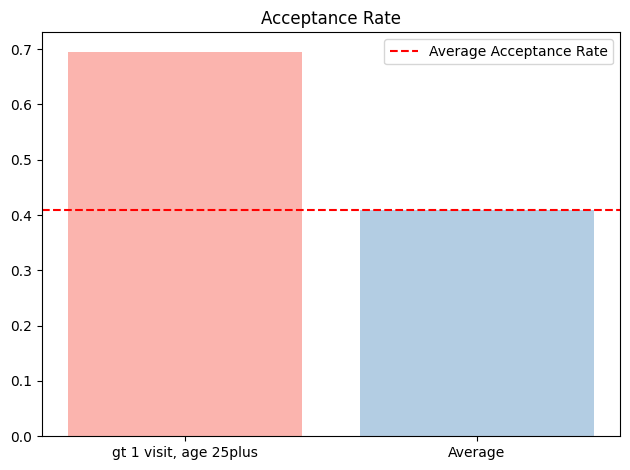

Acceptance rate for those who go to a bar more than once a month and are over the age of 25 : 0.6954436450839329
Default Acceptance rate for Bar :0.4089775561097257
Difference in acceptance rate : 0.28646608897420717


In [191]:
#List of values that identify 1 or more visits to the bar.
#As we are not able to separate 1 visit from from 1-3 vistis, for the purpose of this investigation, ~1-3 would be treate as  greater than 1
gt1 = ['1~3','4~8', 'gt8']
df_bar_gt1_25plus = df_bar.query('(Bar in @gt1) and (age > 25)' )
acceptance_rate_gt1_25plus = df_bar_gt1_25plus.Y.mean()

#Comparison
plt.bar( x = ['gt 1 visit, age 25plus', 'Average'], height = [acceptance_rate_gt1_25plus, bar_coupon_acceptance], color = colors.colors)
plt.title('Acceptance Rate')
plt.axhline(y=df_bar.Y.mean(), color='r', linestyle='--', label = 'Average Acceptance Rate')
plt.tight_layout()
plt.legend()
plt.show()

print("Acceptance rate for those who go to a bar more than once a month and are over the age of 25 : " + str(acceptance_rate_gt1_25plus))
print("Default Acceptance rate for Bar :" + str(bar_coupon_acceptance))
print("Difference in acceptance rate : " + str(acceptance_rate_gt1_25plus - bar_coupon_acceptance))

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


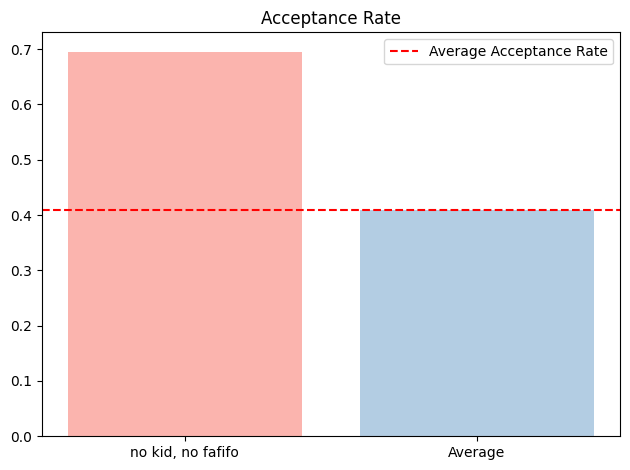

Acceptance rate for those who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry : 0.7122040072859745
Default Acceptance rate for Bar :0.4089775561097257
Difference in acceptance rate : 0.30322645117624886


In [194]:
#generate dataframe with the filters
df_bar_nokid_nofafifo = df_bar.query('(Bar in @gt1)'
                                      + 'and (passanger != \'Kid(s)\')'
                                      + 'and (occupation != \'Farming Fishing & Forestry\')')
acceptance_rate_bar_nokid_nofafifo = df_bar_nokid_nofafifo.Y.mean()

#Comparison
plt.bar( x = ['no kid, no fafifo', 'Average'], height = [acceptance_rate_gt1_25plus, bar_coupon_acceptance], color = colors.colors)
plt.title('Acceptance Rate')
plt.axhline(y=df_bar.Y.mean(), color='r', linestyle='--', label = 'Average Acceptance Rate')
plt.tight_layout()
plt.legend()
plt.show()

print("Acceptance rate for those who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry : " + str(acceptance_rate_bar_nokid_nofafifo))
print("Default Acceptance rate for Bar :" + str(bar_coupon_acceptance))
print("Difference in acceptance rate : " + str(acceptance_rate_bar_nokid_nofafifo - bar_coupon_acceptance))

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



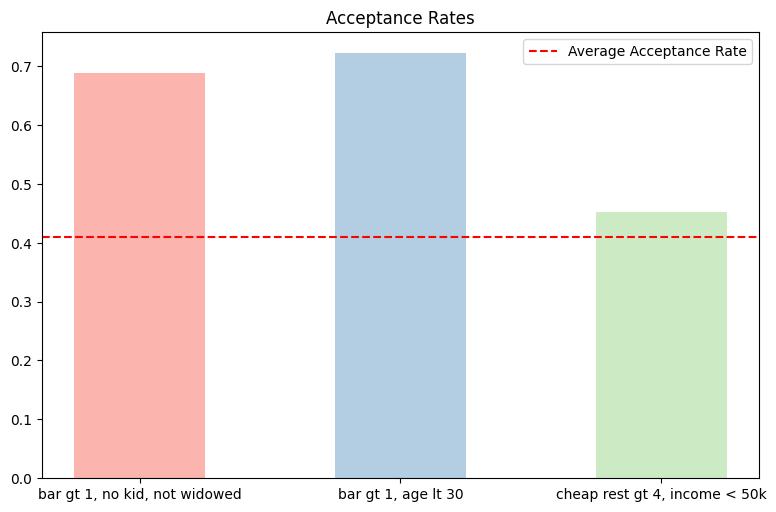

Acceptance rate for those who go to bars more than once a month, had passengers that were not a kid, and were not widowed : 0.688026981450253
Acceptance rate for those who go to bars more than once a month and are under the age of 30 : 0.7217391304347827
Acceptance rate for those who go to cheap restaurants more than 4 times a month and income is less than 50K : 0.45161290322580644


In [195]:
#We are still investigating Bar coupons. hence, use the df_bar as the starting point

#go to bars more than once a month, had passengers that were not a kid, and were not widowed
df_bar_gt1_nokid_nowidow = df_bar.query('(Bar in @gt1)'
                                      + 'and ((passanger != \'Kid(s)\')'
                                              + 'or (maritalStatus != \'Widowed\'))')
acceptance_rate_bar_nokid_nofafifo = df_bar_gt1_nokid_nowidow.query('Y == 1').shape[0]/df_bar_gt1_nokid_nowidow.shape[0]

#go to bars more than once a month and are under the age of 30
df_bar_gt1_lt30 = df_bar.query('(Bar in @gt1) and (age < 30)')
acceptance_rate_bar_gt1_lt30 = df_bar_gt1_lt30.query('Y == 1').shape[0]/df_bar_gt1_lt30.shape[0]

#go to cheap restaurants more than 4 times a month and income is less than 50K
cr_gt4 = ['4~8', 'gt8']
income_lt50k = ['$25000 - $37499', '$12500 - $24999', '$37500 - $49999', 'Less than $12500']
df_crgt4_income_lt50k = df_bar.query('(RestaurantLessThan20 in @cr_gt4) and (income in @income_lt50k)')
acceptance_rate_crgt4_income_lt50k = df_crgt4_income_lt50k.query('Y == 1').shape[0]/df_crgt4_income_lt50k.shape[0]

#Comparison
plt.figure(figsize=(8,5))
plt.bar(x = ['bar gt 1, no kid, not widowed', 'bar gt 1, age lt 30', 'cheap rest gt 4, income < 50k'],
              height = [acceptance_rate_bar_nokid_nofafifo, acceptance_rate_bar_gt1_lt30, acceptance_rate_crgt4_income_lt50k],
              color = colors.colors, width = 0.5 )
plt.axhline(y=df_bar.Y.mean(), color='r', linestyle='--', label = 'Average Acceptance Rate')
plt.tight_layout()
plt.legend()
plt.title('Acceptance Rates')
plt.show()
print("Acceptance rate for those who go to bars more than once a month, had passengers that were not a kid, and were not widowed : " + str(acceptance_rate_bar_nokid_nofafifo))
print("Acceptance rate for those who go to bars more than once a month and are under the age of 30 : " + str(acceptance_rate_bar_gt1_lt30))
print("Acceptance rate for those who go to cheap restaurants more than 4 times a month and income is less than 50K : " + str(acceptance_rate_crgt4_income_lt50k))

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on these observation, the following could be hypothesized :

1.   Turkers who frequent bars often have a high probability of accepting a bar coupon
2.   Turkers who drink and are over 25 years of age will most likely accept a bar coupon
3. Low income Turkers would accept a Bar coupon sometimes, but, they would prefer a differnt type of coupon



### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

**Investigating coffee coupons**

Lets start by identifying what percentage of Coffee coupons were accepted

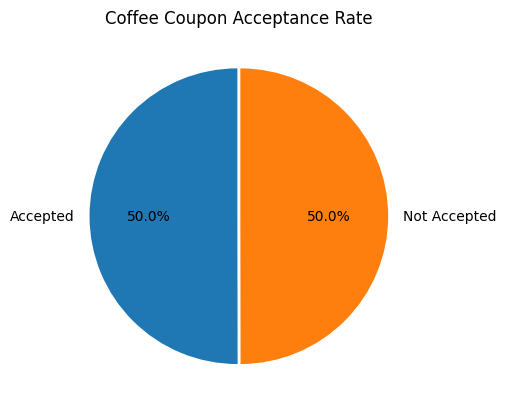

Percentage of Coffee coupons that were accepted : 0.49974798387096775


In [385]:
# What percentage of Coffee coupons were accepted?
df_coffee = data[data['coupon'] == 'Coffee House']

plt.pie(df_coffee['Y'].value_counts(), labels=['Accepted', 'Not Accepted'], autopct='%1.1f%%', startangle=90,
        explode=(0.01, 0.01))
plt.title('Coffee Coupon Acceptance Rate')
plt.show()

print("Percentage of Coffee coupons that were accepted : " + str(df_coffee.Y.mean()))

Only 50% of Coffee coupons were accepted!

Digging into the scenarios where Coffee coupon is more likely to be accepted

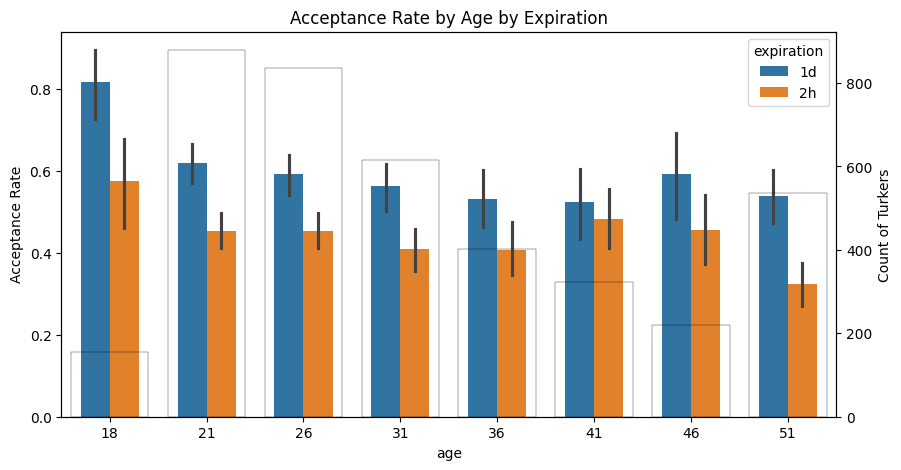

In [362]:
#As the sns barplot shows mean values of the Y axis,
# this is the best way to describe acceptace rates
plt.figure(figsize=(10,5))
ax = sns.barplot(data=df_coffee.sort_values(by='age'), x='age', y='Y', hue='expiration', width=0.6)
plt.title('Acceptance Rate by Age by Expiration')
plt.ylabel('Acceptance Rate')

ax2 = ax.twinx()
sns.countplot(data=df_coffee, x='age', ax=ax2, fill=False, saturation= 0.25, edgecolor='black', linewidth=0.25)
ax2.set_ylabel('Count of Turkers')

plt.show()

**Inference**

When expiration is set for a day rather than 2 hours, there is a higher chance of the coupon being accepted across age groups

Now, evaluating across income ranges and co-riders

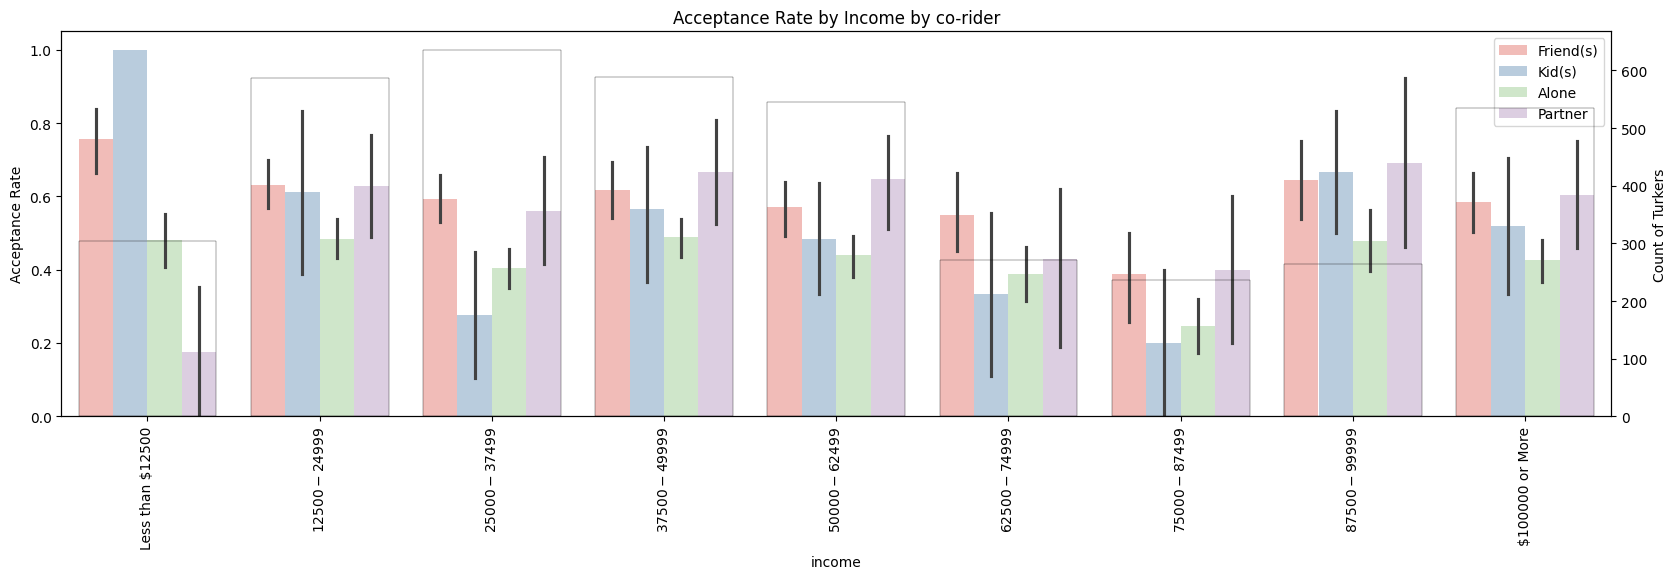

In [360]:
#income ranges
income_ranges = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999', '$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More' ]

#plot income against Acceptance rates and also superimpose counts of Turkers on it
plt.figure(figsize=(20,5))
ax = sns.barplot(data=df_coffee, x='income', y='Y', hue='passanger', palette=colors.colors, order=income_ranges)
plt.xticks(rotation=90)
plt.title('Acceptance Rate by Income by co-rider')
plt.legend(loc= 'upper right')
plt.ylabel('Acceptance Rate')
ax2 = ax.twinx()
sns.countplot(data=df_coffee, x='income', order=income_ranges,
              ax=ax2, fill=False, saturation= 0.25, edgecolor='black', linewidth=0.25)
ax2.set_ylabel('Count of Turkers')
plt.show()

**Inference**
- Very low income / unemployed Turkers will most probably accept the coffee coupon if they are travelling with kids, but not at all when travelling with their partner
- There is a higher chance of accepting the Coffee coupon when travelling with Friends across income ranges

Now, checking how folks who frequent Coffeehouses use the Coffee coupon

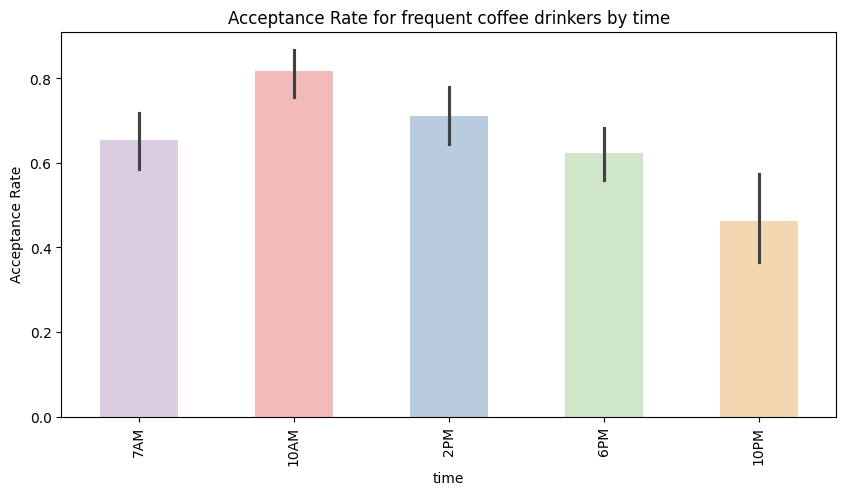

Acceptance rates for those who frequent coffee shops : 0.675


In [327]:
#Acceptance rates for Turkrs who frequent cofee shops (more than 3 times a month)
df_coffee_gt3 = df_coffee.query('CoffeeHouse in @gt3')
acceptance_rate_coffee_gt3 = df_coffee_gt3.Y.mean()

plt.figure(figsize=(10,5))
ax = sns.barplot(data=df_coffee_gt3, x='time', y='Y', hue='time', width=0.5,
                 palette=colors.colors, order=['7AM','10AM', '2PM', '6PM', '10PM'])
plt.xticks(rotation=90)
plt.title('Acceptance Rate for frequent coffee drinkers by time')
plt.ylabel('Acceptance Rate')
plt.show()

print("Acceptance rates for those who frequent coffee shops : " + str(acceptance_rate_coffee_gt3))

This indicates that the best time to provide Coffee coupons for frequent coffee drinkers is before nighttime

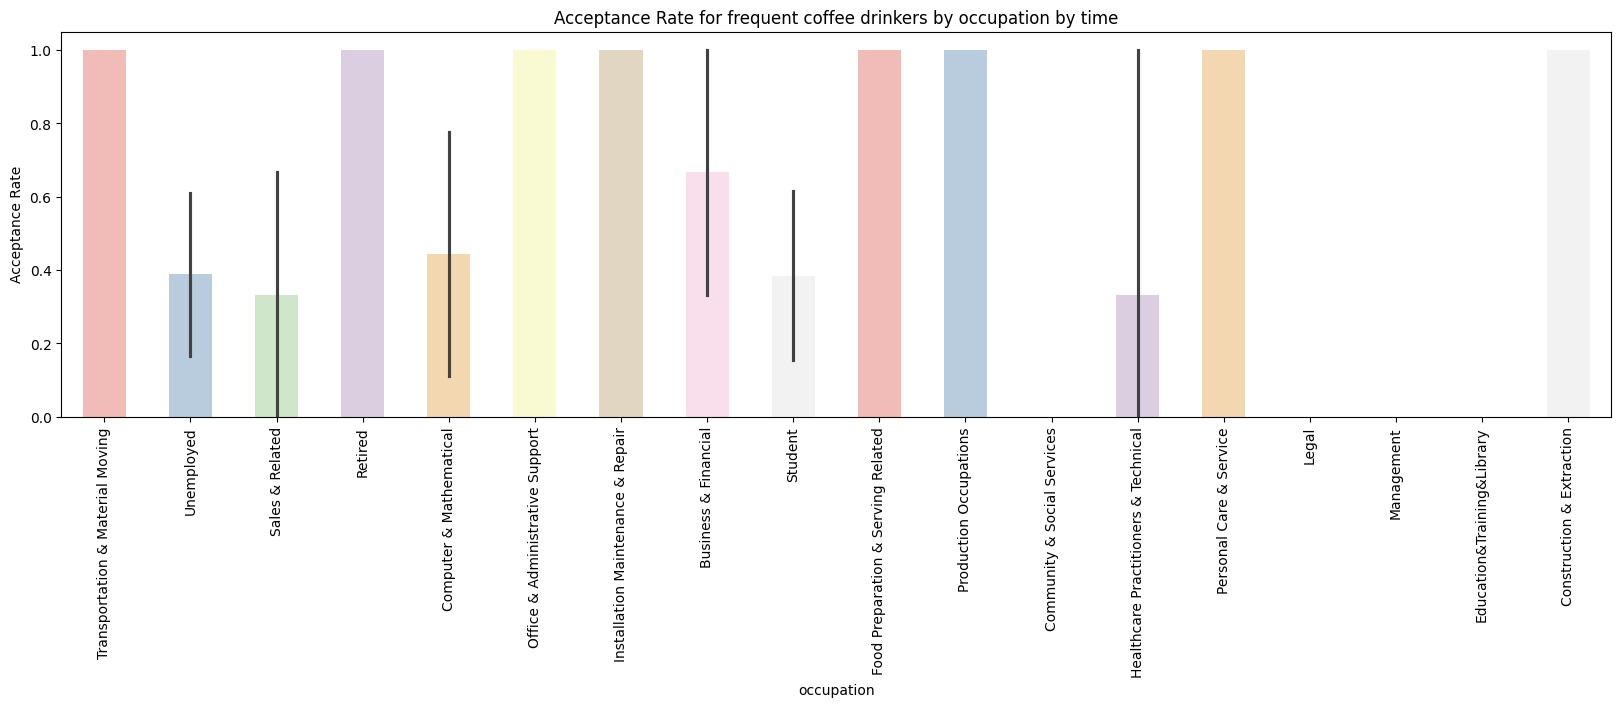

Occupations with high acceptance rates for night time coffee drinking : 
Construction & Extraction, Food Preparation & Serving Related, Installation Maintenance & Repair, Office & Administrative Support, Personal Care & Service, Production Occupations, Retired, Transportation & Material Moving


In [401]:
#Does occupation have any connection to Coffee consumption during the night?
df_coffee_night = df_coffee_gt3.query('time == "10PM"')

plt.figure(figsize=(20,5))
ax = sns.barplot(data=df_coffee_night, x='occupation', y='Y', hue = 'occupation', legend = False, width=0.5,palette=colors.colors)
plt.xticks(rotation=90)
plt.title('Acceptance Rate for frequent coffee drinkers by occupation by time')
plt.ylabel('Acceptance Rate')
plt.show()

print('Occupations with high acceptance rates for night time coffee drinking : ' )
print(', '.join(df_coffee_night.groupby('occupation').Y.mean().reset_index().query('Y == 1')['occupation'].values.tolist()))

**Inference**
- In general, the acceptance of Coffee coupons is higher during daytime
- For frequent coffee drinkers in the following professions, Coffee coupons are the way to go as there is a near 100% chance that they would use it
  - Construction & Extraction
  - Food Preparation & Serving Related
  - Installation Maintenance & Repair
  - Office & Administrative Support
  - Personal Care & Service
  - Production Occupations
  - Retired
  - Transportation & Material Moving